<a href="https://colab.research.google.com/github/alfazick/deeplearningLLM/blob/main/manualgradientdescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(42)

# True parameters we want to learn
true_b = 0.5  # intercept
true_w = -3   # slope
N = 100       # number of data points

# Generate input features
x = np.random.rand(N, 1)

# Generate target values with some noise
epsilon = 0.1 * np.random.randn(N, 1)
y = true_b + true_w * x + epsilon

# Split into training and validation sets
idx = np.arange(N)
np.random.shuffle(idx)

# Use 80% for training
train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [4]:
def plot_data_and_model(x, y, w, b, title=""):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='blue', label='Data points')

    # Generate points for the line
    x_line = np.array([0, 1])
    y_line = w * x_line + b
    plt.plot(x_line, y_line, 'r-', label=f'Model: y = {b:.2f} + {w:.2f}x')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_loss_history(losses):
    plt.figure(figsize=(10, 6))
    plt.plot(losses)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss History')
    plt.grid(True)
    plt.show()

Initial parameters - b: 0.4967, w: -0.1383


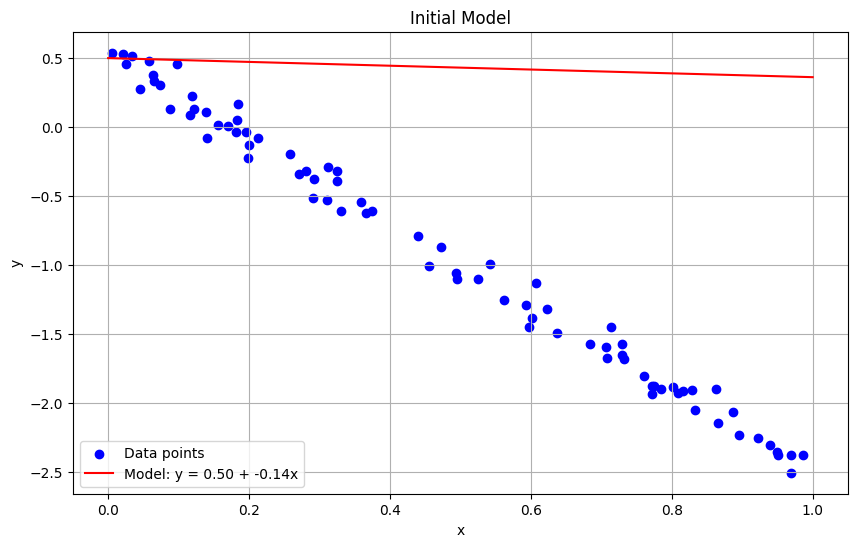

In [5]:
np.random.seed(42)
b = np.random.randn(1)[0]  # Initialize intercept
w = np.random.randn(1)[0]  # Initialize slope

print(f"Initial parameters - b: {b:.4f}, w: {w:.4f}")
plot_data_and_model(x_train, y_train, w, b, "Initial Model")

Epoch 0: Loss = 2.588058, b = 0.2287, w = -0.3191


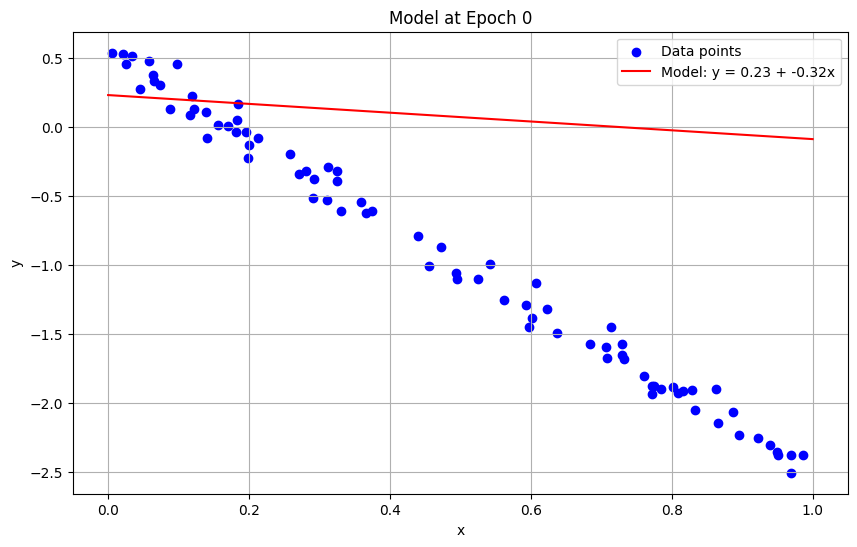

Epoch 100: Loss = 0.032139, b = 0.2704, w = -2.5357


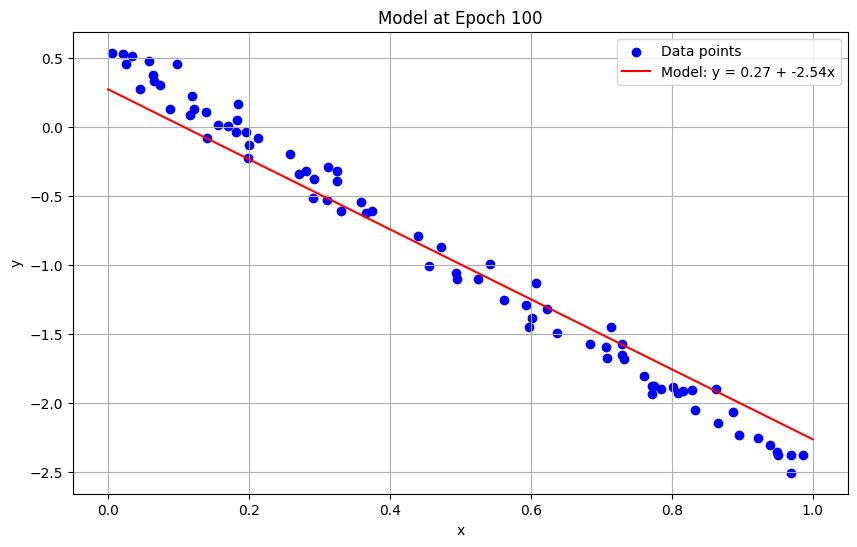

Epoch 200: Loss = 0.009192, b = 0.4683, w = -2.9229


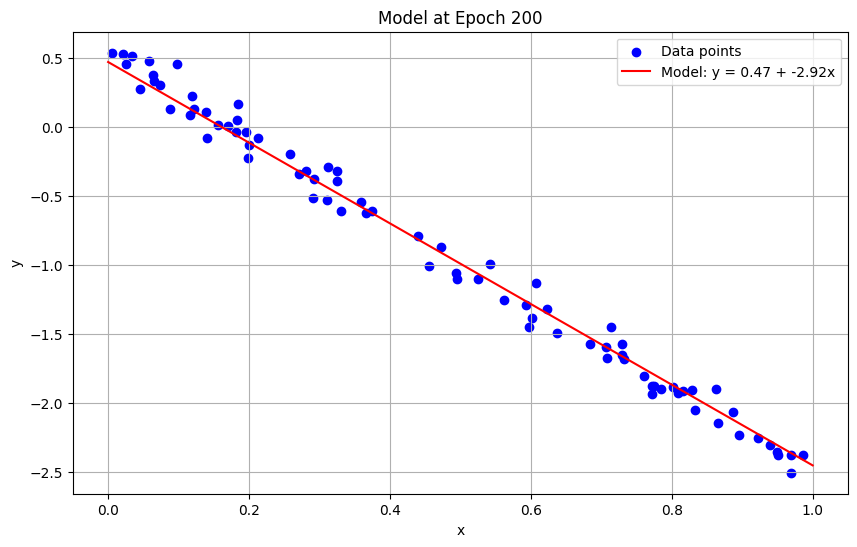

Epoch 300: Loss = 0.008099, b = 0.5115, w = -3.0074


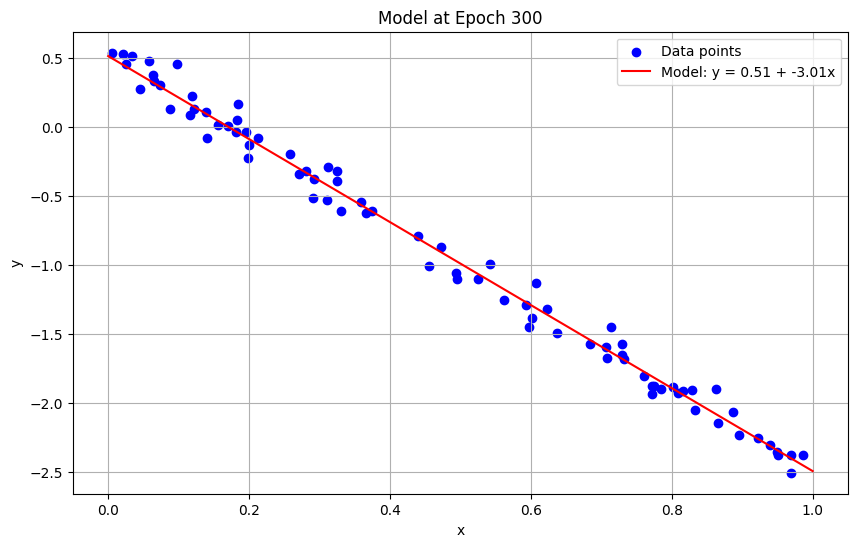

Epoch 400: Loss = 0.008047, b = 0.5209, w = -3.0259


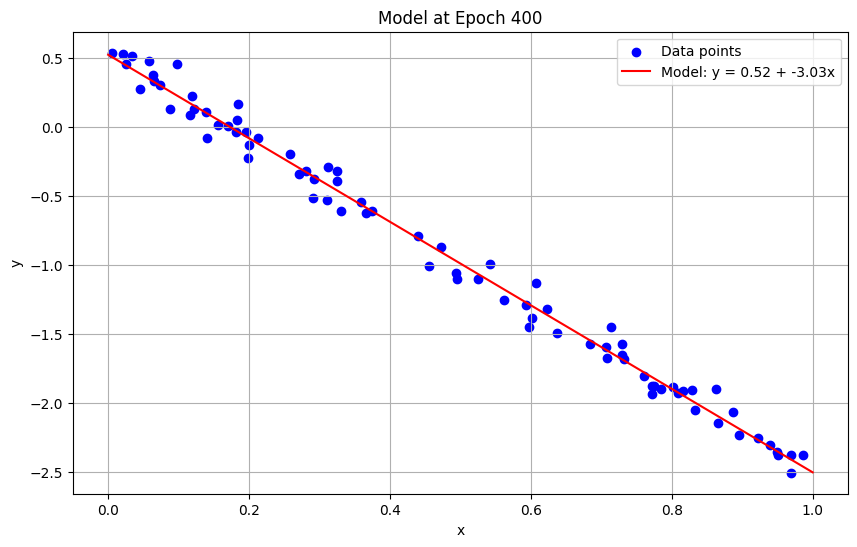

Epoch 500: Loss = 0.008045, b = 0.5230, w = -3.0299


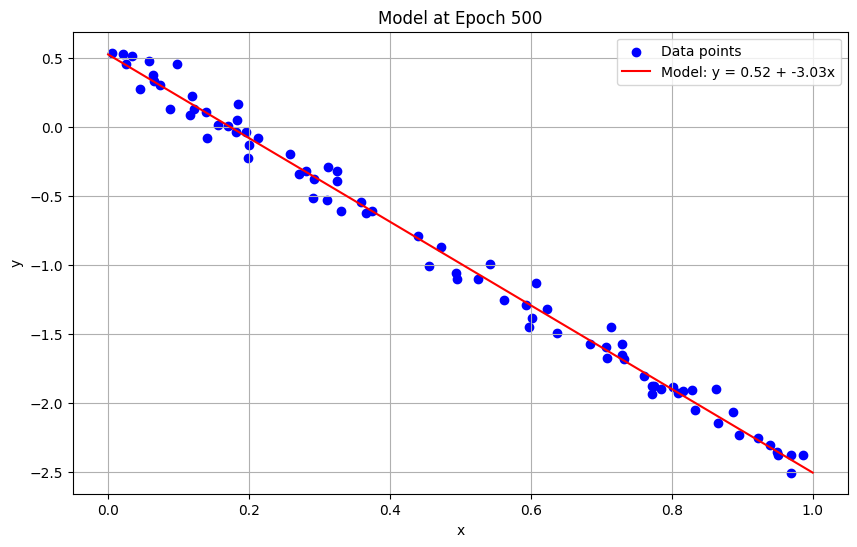

Epoch 600: Loss = 0.008045, b = 0.5234, w = -3.0308


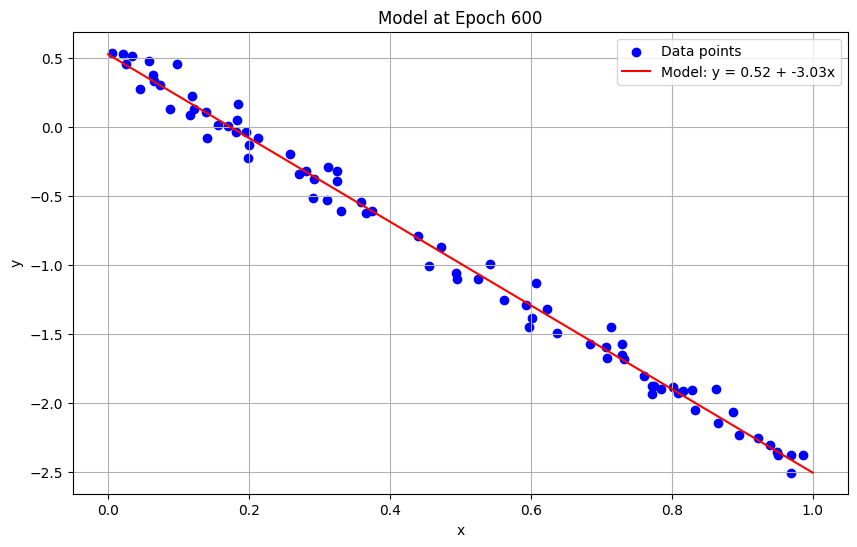

Epoch 700: Loss = 0.008045, b = 0.5235, w = -3.0310


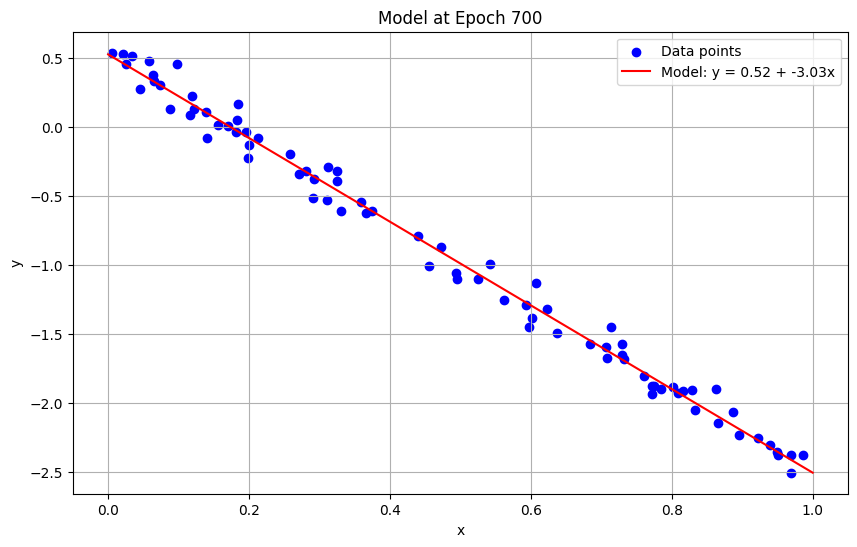

Epoch 800: Loss = 0.008045, b = 0.5235, w = -3.0310


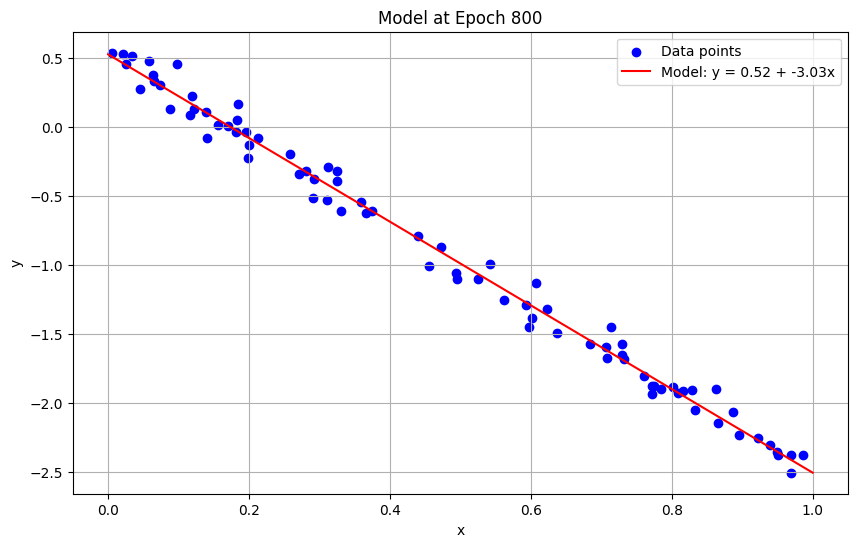

Epoch 900: Loss = 0.008045, b = 0.5235, w = -3.0310


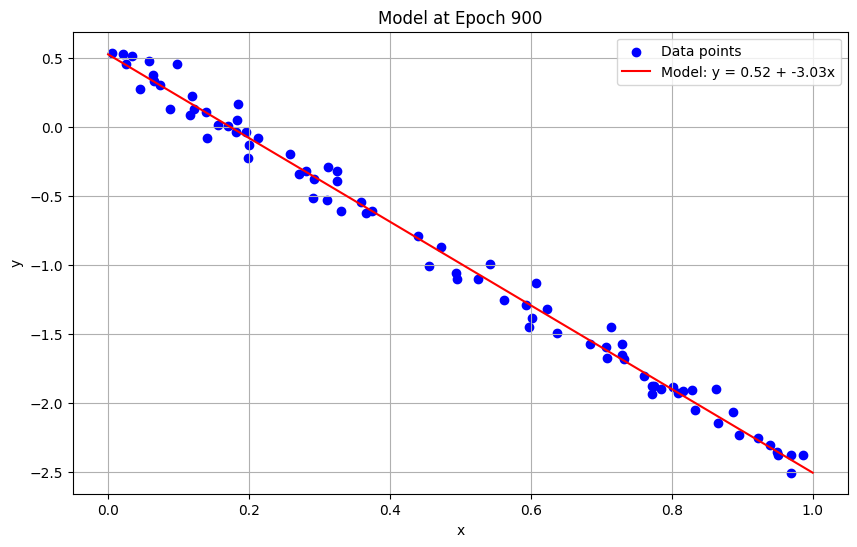

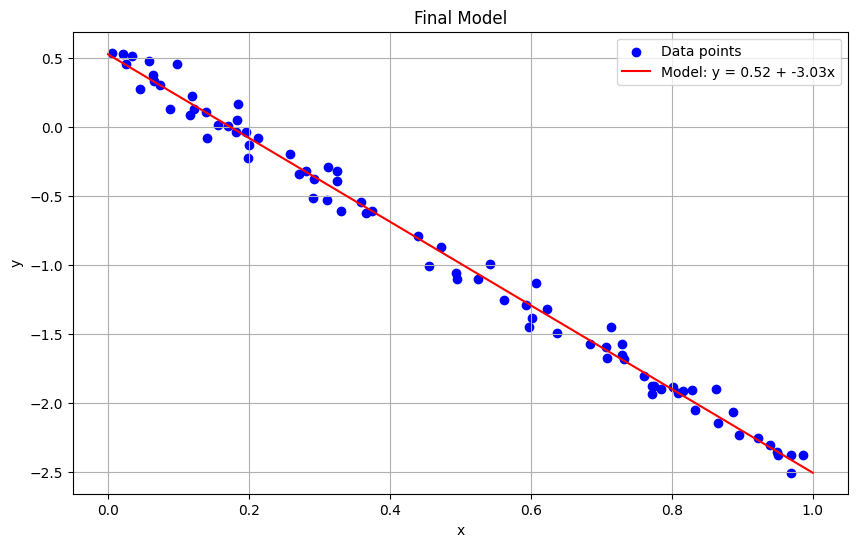

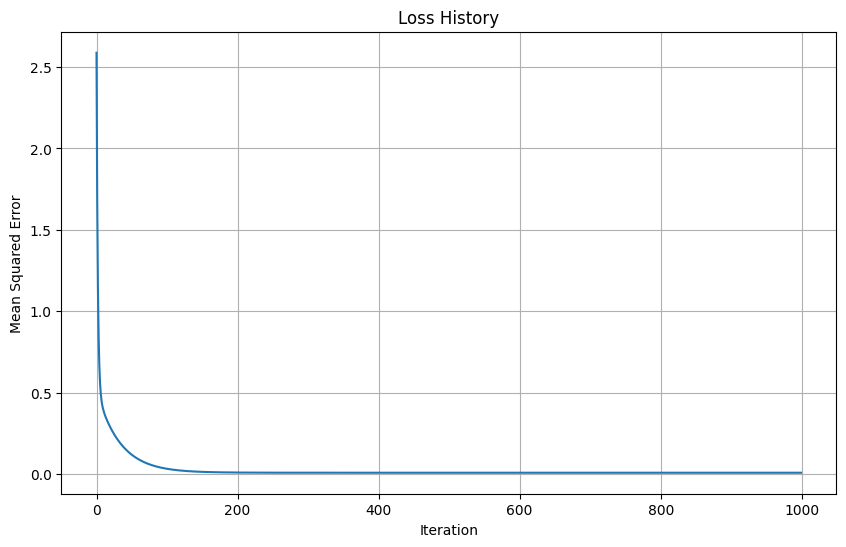

In [6]:
# Hyperparameters
learning_rate = 0.1
n_iterations = 1000

# Lists to store history
losses = []
params_history = []

for epoch in range(n_iterations):
    # Step 1: Forward pass (make predictions)
    y_pred = w * x_train + b

    # Step 2: Compute loss (MSE)
    error = y_pred - y_train
    loss = np.mean(error ** 2)
    losses.append(loss)

    # Step 3: Compute gradients
    b_grad = 2 * np.mean(error)
    w_grad = 2 * np.mean(x_train * error)

    # Step 4: Update parameters
    b = b - learning_rate * b_grad
    w = w - learning_rate * w_grad

    # Store parameters
    params_history.append((b, w))

    # Print progress every 100 iterations
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}, b = {b:.4f}, w = {w:.4f}")
        plot_data_and_model(x_train, y_train, w, b, f"Model at Epoch {epoch}")

# Plot final model
plot_data_and_model(x_train, y_train, w, b, "Final Model")
plot_loss_history(losses)